# Imports

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
#Imports de base
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
#Import du fichier à analyser
PA75016_df = pd.read_csv("/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/data/pollution/2_Processed/PA75016.csv").copy()
PA75016_df = PA75016_df[:-25]
PA75016_df






,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4,NaN,NaN,75016 - Porte Auteuil,Traffic
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6,NaN,NaN,75016 - Porte Auteuil,Traffic
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1,NaN,NaN,75016 - Porte Auteuil,Traffic
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4,NaN,NaN,75016 - Porte Auteuil,Traffic


# EDA

In [4]:
from workflow.utils import analyse_df


In [5]:
#Analyse du fichier PA75016
analyse_df(PA75016_df)

General Info:
42551 Rows 8 Columns
0 Duplicated Rows
Memory Usage: 2.60Mb

Columns float64: ['PM25', 'PM10', 'NO2', 'O3', 'SO2']

Columns object: ['Date_time', 'Station_name', 'Station_type']


,PM25,PM10,NO2,O3,SO2
count,41229.000000,41405.000000,40738.000000,0.0,25444.000000
mean,15.098152,33.391631,73.241266,NaN,1.309079
std,8.906364,17.560687,29.101300,NaN,1.363716
min,0.000000,0.400000,5.100000,NaN,0.000000
25%,9.200000,21.100000,53.500000,NaN,0.200000
50%,13.000000,29.900000,71.100000,NaN,1.000000
75%,18.400000,41.800000,90.300000,NaN,2.000000
max,193.000000,253.000000,286.000000,NaN,75.900000



Cheking Missing Values:
Column "PM25" has 1322 missing values (3.11%)
Column "PM10" has 1146 missing values (2.69%)
Column "NO2" has 1813 missing values (4.26%)
Column "O3" has 42551 missing values (100.00%)
Column "SO2" has 17107 missing values (40.20%)

Checking Linear Correlation:
Linear Correlation found between columns PM10 and PM25 -> Pearson coef. = 0.78


/Users/Edouard_1/code/TheLab75/ParisDeepAirProject/workflow/utils.py:84: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr() # Correlation DataFrame


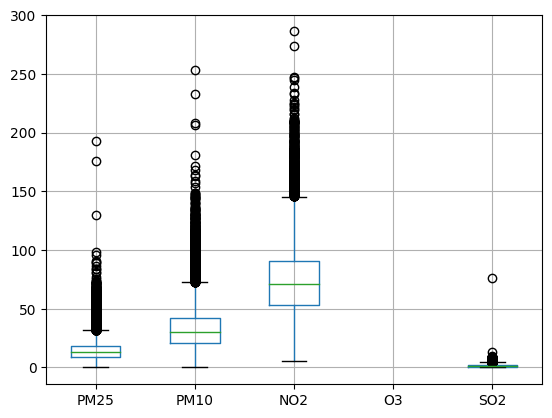

In [6]:
PA75016_df.boxplot();

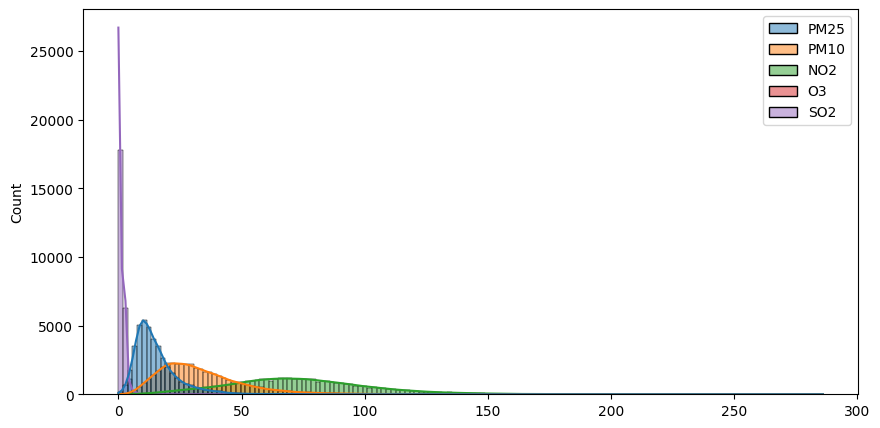

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data=PA75016_df,kde=True,bins=150)
plt.show()

## Conlusion de l'EDA

Synthèse de l'EDA sur la station PA75016:
- De 2018 à 2022, la part de NaN est faible pour les polluants suivants : PM25, PM10 & NO2 (<6% de NaN) --> **À garder.**
- Concernnant le SO2, la part de NaN est faible, progresse à partir de 2020, pour exploser en 2021, et atteindre 100% en 2022. -->  **À dropper.**
- Concernant l'O3, le nombre de NaN est à 100% de 2018 à 2022 --> **À dropper.**

# Preprocessing

In [8]:
## Drop des colonnes avec beaucoup de Nan
PA75016_df = PA75016_df.drop(columns=['O3', 'SO2', 'Station_name', 'Station_type'])
PA75016_df


,Date_time,PM25,PM10,NO2
0,2018/01/01 01:00:00+00,NaN,NaN,NaN
1,2018/01/01 02:00:00+00,NaN,NaN,NaN
2,2018/01/01 03:00:00+00,NaN,NaN,NaN
3,2018/01/01 04:00:00+00,NaN,NaN,NaN
4,2018/01/01 05:00:00+00,NaN,NaN,NaN
...,...,...,...,...
42546,2022/11/13 19:00:00+00,18.5,18.2,35.4
42547,2022/11/13 20:00:00+00,18.8,21.8,29.6
42548,2022/11/13 21:00:00+00,19.4,29.9,32.1
42549,2022/11/13 22:00:00+00,22.8,23.2,29.4


## X & y - SimpleImputer

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

num_features_normal = ['NO2']
num_features_skewed = ['PM25','PM10']

num_imputer_normal = make_pipeline(
    SimpleImputer(strategy='median'))

num_imputer_skewed = make_pipeline(
    SimpleImputer(strategy='median'))

preprocessor_imputer = make_column_transformer(
    (num_imputer_normal, num_features_normal),
    (num_imputer_skewed, num_features_skewed))

preprocessor_imputer


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['NO2']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['PM25', 'PM10'])])

In [10]:
PA75016_preprocessed = pd.DataFrame(preprocessor_imputer.fit_transform(PA75016_df))


In [11]:
PA75016_preprocessed = PA75016_preprocessed.rename(columns={0:"PM25",1:"PM10",2:"NO2"})
PA75016_preprocessed = PA75016_preprocessed.set_index(PA75016_df['Date_time'])


In [12]:
PA75016_preprocessed


,PM25,PM10,NO2
Date_time,,,
2018/01/01 01:00:00+00,71.1,13.0,29.9
2018/01/01 02:00:00+00,71.1,13.0,29.9
2018/01/01 03:00:00+00,71.1,13.0,29.9
2018/01/01 04:00:00+00,71.1,13.0,29.9
2018/01/01 05:00:00+00,71.1,13.0,29.9
...,...,...,...
2022/11/13 19:00:00+00,35.4,18.5,18.2
2022/11/13 20:00:00+00,29.6,18.8,21.8
2022/11/13 21:00:00+00,32.1,19.4,29.9


In [13]:
PA75016_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42551 entries, 2018/01/01 01:00:00+00 to 2022/11/13 23:00:00+00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    42551 non-null  float64
 1   PM10    42551 non-null  float64
 2   NO2     42551 non-null  float64
dtypes: float64(3)
memory usage: 1.3+ MB


## X & y - Passer Date_time d'un step horaire à un step journalier

In [14]:
from workflow.daily_basis import mean_max_categorical

PA75016_daily = mean_max_categorical(PA75016_preprocessed)


In [15]:
PA75016_daily


,Date_time,PM25,PM10,NO2
0,2018/01/01,71.10,13.00,29.9
1,2018/01/02,71.10,13.00,29.9
2,2018/01/03,71.10,13.00,29.9
3,2018/01/04,71.10,13.00,29.9
4,2018/01/05,71.10,12.83,36.2
...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0
1771,2022/11/10,55.69,13.10,42.8
1772,2022/11/11,35.26,10.79,25.7
1773,2022/11/12,49.01,23.87,82.2


## Obtenir y

In [16]:
from workflow.calcul_ATMO import general_categorical

PA75016_daily_cat = PA75016_daily.copy()
PA75016_daily_cat = general_categorical(PA75016_daily_cat)
PA75016_daily_cat
from workflow.calcul_ATMO import calcul_ATMO

PA75016_daily_cat = calcul_ATMO(PA75016_daily_cat)
PA75016_daily_cat



,Date_time,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO
0,2018/01/01,71.10,13.00,29.9,4,0,0,4
1,2018/01/02,71.10,13.00,29.9,4,0,0,4
2,2018/01/03,71.10,13.00,29.9,4,0,0,4
3,2018/01/04,71.10,13.00,29.9,4,0,0,4
4,2018/01/05,71.10,12.83,36.2,4,0,0,4
...,...,...,...,...,...,...,...,...
1770,2022/11/09,57.41,9.46,36.0,4,0,0,4
1771,2022/11/10,55.69,13.10,42.8,4,0,1,4
1772,2022/11/11,35.26,10.79,25.7,3,0,0,3
1773,2022/11/12,49.01,23.87,82.2,3,1,1,3


In [17]:


PA75016_daily_cat["Date_time"]= pd.to_datetime(PA75016_daily_cat["Date_time"])
PA75016_daily_cat.dtypes
PA75016_daily_cat
PA75016_daily_cat["year"] = PA75016_daily_cat["Date_time"].dt.year
PA75016_daily_cat["week"] = PA75016_daily_cat["Date_time"].dt.week
PA75016_daily_cat["day"] = PA75016_daily_cat["Date_time"].dt.day
PA75016_daily_cat["month"] = PA75016_daily_cat["Date_time"].dt.month
PA75016_daily_cat["weekday_name"] = PA75016_daily_cat["Date_time"].dt.day_of_week


PA75016_daily_cat["weekday_name"].unique()



#Ici on veut grouper les colonnes de 2018 par semaine et extraire la med

#df_all_year = PA75016_daily_cat.groupby(by=["year","week"],as_index=False).mean()








#df_all_year





/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_33436/1383698881.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  PA75016_daily_cat["week"] = PA75016_daily_cat["Date_time"].dt.week


array([0, 1, 2, 3, 4, 5, 6])

In [18]:
df_all_month = PA75016_daily_cat.groupby(by=["year","month"],as_index=False).mean()

df_all_month
    
    
    

/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_33436/1512528829.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all_month = PA75016_daily_cat.groupby(by=["year","month"],as_index=False).mean()


,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,weekday_name
0,2018,1,76.916774,15.090968,45.022581,4.580645,0.225806,0.516129,4.580645,2.741935,16.000000,2.806452
1,2018,2,93.398929,23.745357,78.278571,4.857143,0.678571,1.321429,4.857143,6.928571,14.500000,3.000000
2,2018,3,93.063548,18.120323,68.622581,4.935484,0.322581,1.129032,4.935484,11.129032,16.000000,3.096774
3,2018,4,89.835667,15.195333,70.423333,4.866667,0.200000,1.233333,4.866667,15.500000,15.500000,3.000000
4,2018,5,88.965484,18.448065,70.487097,4.774194,0.354839,1.193548,4.774194,19.870968,16.000000,2.903226
5,2018,6,89.659333,17.202667,61.230000,4.866667,0.200000,1.033333,4.866667,24.200000,15.500000,3.100000
6,2018,7,103.715806,16.052903,74.529032,4.774194,0.258065,1.258065,4.774194,28.580645,16.000000,2.935484
7,2018,8,79.479677,12.781290,67.070968,4.387097,0.064516,1.129032,4.387097,33.000000,16.000000,3.000000
8,2018,9,91.754667,15.897000,73.986667,4.800000,0.200000,1.166667,4.800000,37.333333,15.500000,3.166667
9,2018,10,83.502258,18.715484,66.770968,4.612903,0.387097,1.000000,4.612903,41.741935,16.000000,2.806452


In [19]:
df_all_month[df_all_month["month"] == 1]


,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,weekday_name
0,2018,1,76.916774,15.090968,45.022581,4.580645,0.225806,0.516129,4.580645,2.741935,16.0,2.806452
12,2019,1,85.196452,19.085484,59.919355,4.838710,0.387097,0.935484,4.838710,2.870968,16.0,2.903226
24,2020,1,67.353226,17.884194,62.709677,4.096774,0.354839,1.000000,4.096774,3.000000,16.0,3.000000
36,2021,1,64.229677,18.519032,55.241935,4.129032,0.451613,0.806452,4.129032,7.387097,16.0,3.193548
48,2022,1,67.455161,20.881290,64.154839,4.225806,0.548387,0.935484,4.225806,5.774194,16.0,3.064516


In [57]:
import calendar
df_all_month['month'] = df_all_month['month'].apply(lambda x: calendar.month_abbr[x])




TypeError: list indices must be integers or slices, not str

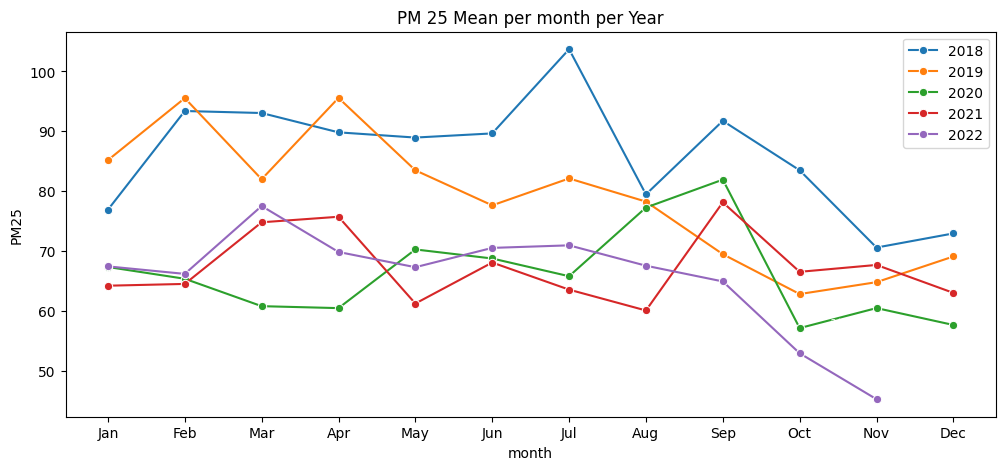

In [21]:
#df_all_month = PA75016_daily_cat.groupby(by=["year","month"]as_index=False).mean()
#df_all_month


import seaborn as sns 
#On veut plotter une année uniquement 
#Ensuite on veut plotter toutes les années sur un plot 

plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


ax1 = sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[:12],
             marker = "o",label="2018")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[12:24],
             marker = "o",label="2019")

sns.lineplot(x = "month", y ="PM25", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[36:48],
             marker = "o",label="2021")

sns.lineplot(x = "month", y = "PM25", data=df_all_month.iloc[48:59],
             marker = "o",label="2022").set_title("PM 25 Mean per month per Year")




ax1.text("Apr",58,"1er Confinement", 
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment


ax1.text("Nov",58,"2ème Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.text("May",58,"3ème Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
       va = "top") # Vertical alignment





plt.show()










#Ajout d'un marqueur de confinement



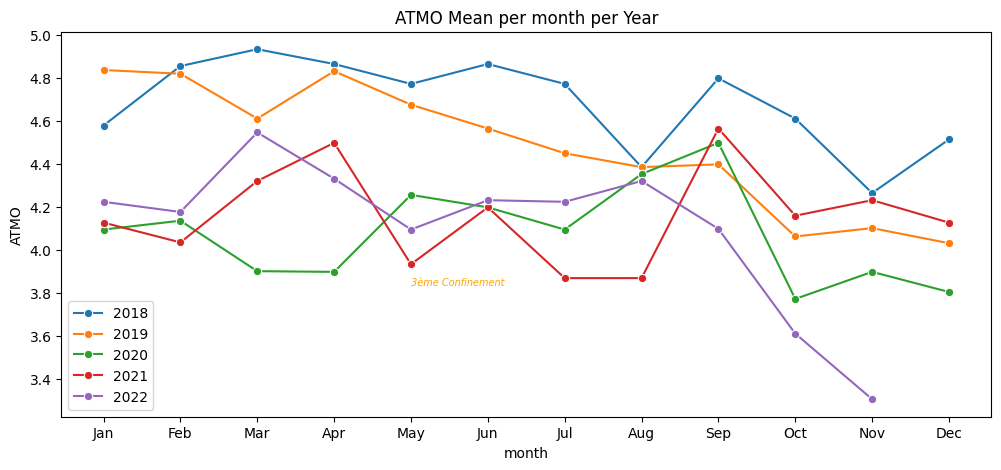

In [22]:
plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


ax1 = sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[:12],
                   
             marker = "o",label="2018")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             
             marker = "o",label="2019")

sns.lineplot(x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             
             marker = "o",label="2020")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             
             marker = "o",label="2021")

sns.lineplot(x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             
             marker = "o",label="2022").set_title("ATMO Mean per month per Year")



ax1.text("Apr",3.8,"1er Confinement", 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "white",          # Color
       ha = "center", # Horizontal alignment
         
         
         
       va = "center") # Vertical alignment


ax1.text("Nov",3.8,"2ème Confinement", 
         
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
       color = "white",          # Color
         
         
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.text("May",3.85,"3ème Confinement", 
         
         
 
         
       fontsize = 7,          # Size
         
         
       fontstyle = "italic",  # Style
         
       color = "orange",          # Color
         
       ha = "left", # Horizontal alignment
         
         
         
       va = "center") # Vertical alignment


plt.show()




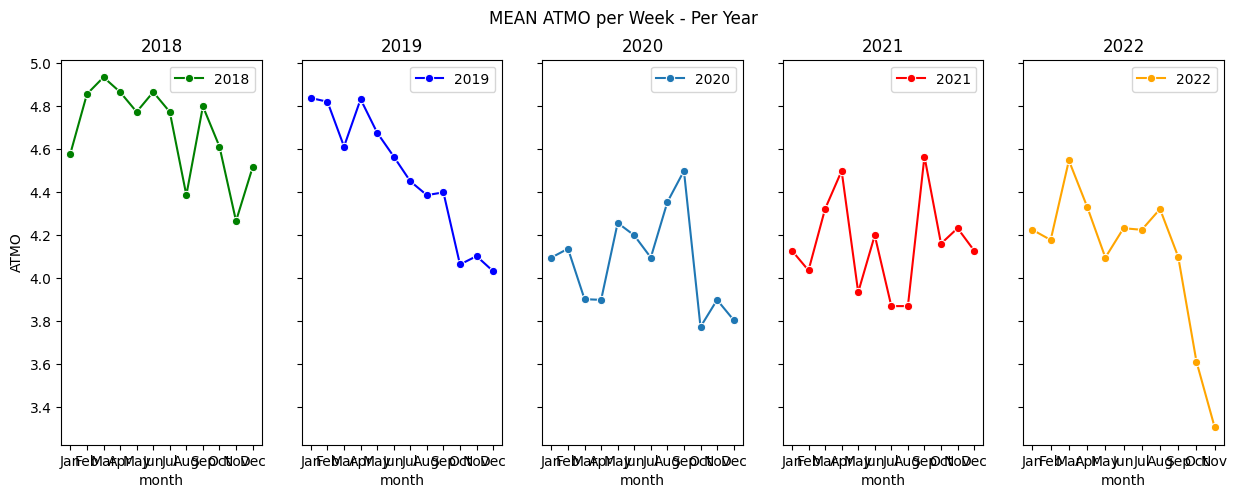

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")
axes[0].set_title("2018")



# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange").set_title("ATMO Mean per Week per Year")

axes[4].set_title("2022")




#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()







In [24]:
df_mean_year = PA75016_daily_cat.groupby(by=["year"],as_index=False).mean()
df_mean_year



/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_33436/1966568787.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_year = PA75016_daily_cat.groupby(by=["year"],as_index=False).mean()


,year,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,month,weekday_name
0,2018,86.102274,17.196356,65.139178,4.684932,0.301370,1.041096,4.684932,26.430137,15.720548,6.526027,2.991781
1,2019,78.794490,15.632727,59.977686,4.482094,0.212121,0.947658,4.482094,26.311295,15.721763,6.498623,2.980716
2,2020,66.104918,12.760929,48.924044,4.076503,0.092896,0.661202,4.076503,26.928962,15.756831,6.513661,2.997268
3,2021,67.288242,14.755659,51.781319,4.162088,0.159341,0.706044,4.162088,26.634615,15.736264,6.538462,3.005495
4,2022,66.624858,14.783596,50.240379,4.151420,0.167192,0.687697,4.151420,23.182965,15.356467,5.750789,3.015773


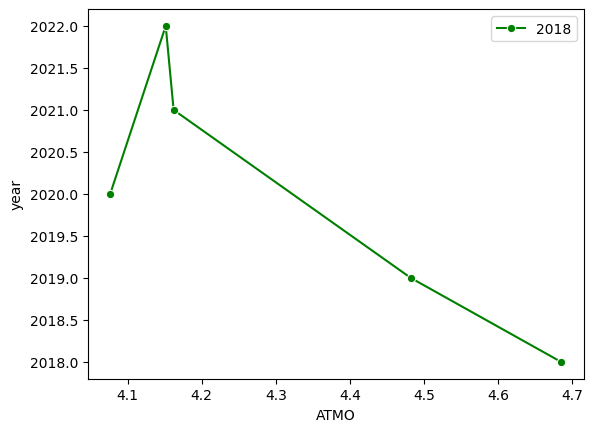

In [25]:
sns.lineplot( x = "ATMO", y = "year", data=df_mean_year.iloc[0:12],
             
             
             
             
             marker = "o",label="2018",color = "green")
plt.show()












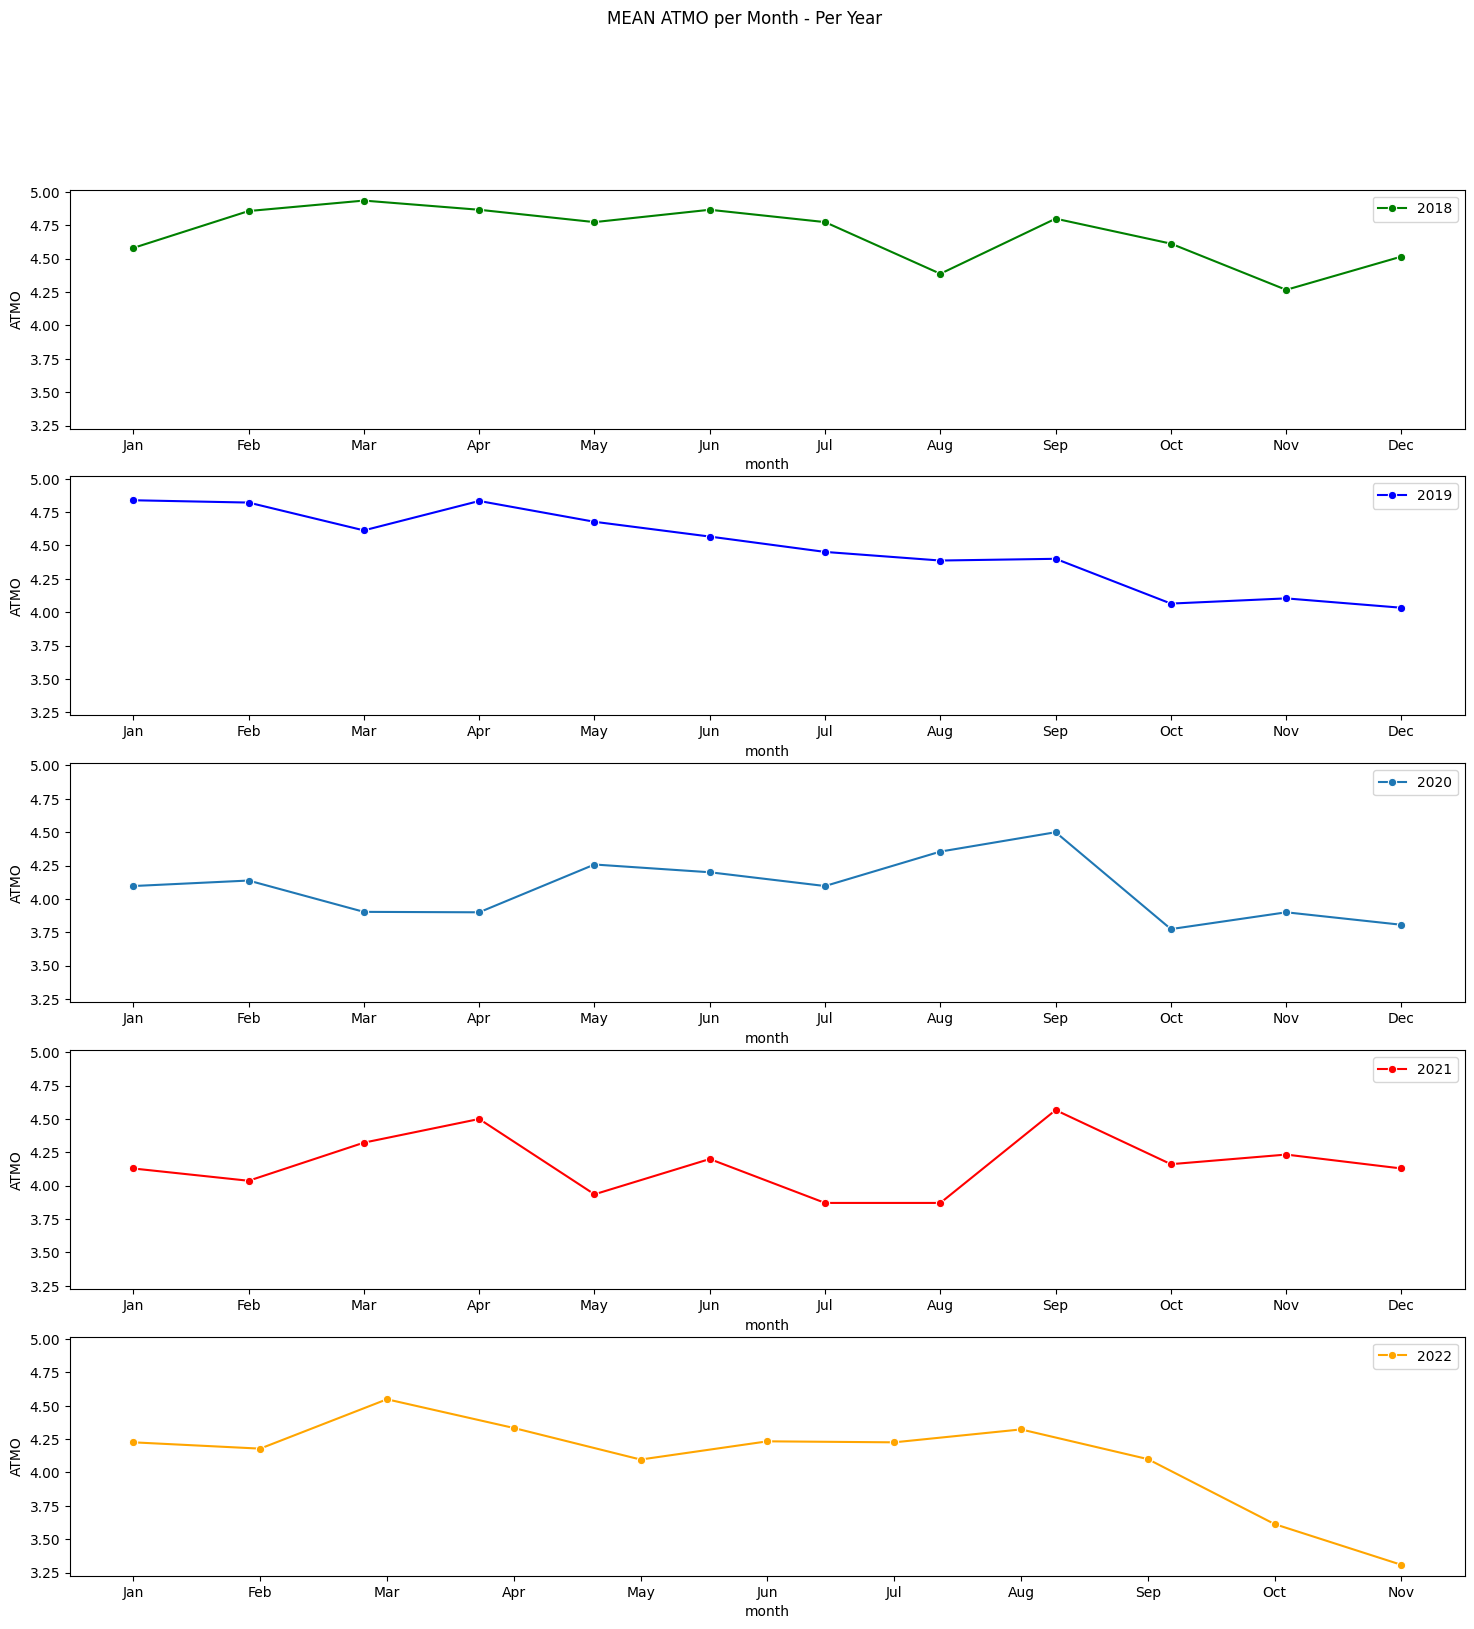

In [26]:
fig, axes = plt.subplots(5, 1, figsize=(18, 18), sharey=True)





fig.suptitle('MEAN ATMO per Month - Per Year')


# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")
#axes[0].set_title("2018")

#sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
            # marker = "o",label="2018",color = "green")
    



    



# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")





#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()

In [27]:
df_all_month[:]

,year,month,PM25,PM10,NO2,PM25_categorical,PM10_categorical,NO2_categorical,ATMO,week,day,weekday_name
0,2018,Jan,76.916774,15.090968,45.022581,4.580645,0.225806,0.516129,4.580645,2.741935,16.000000,2.806452
1,2018,Feb,93.398929,23.745357,78.278571,4.857143,0.678571,1.321429,4.857143,6.928571,14.500000,3.000000
2,2018,Mar,93.063548,18.120323,68.622581,4.935484,0.322581,1.129032,4.935484,11.129032,16.000000,3.096774
3,2018,Apr,89.835667,15.195333,70.423333,4.866667,0.200000,1.233333,4.866667,15.500000,15.500000,3.000000
4,2018,May,88.965484,18.448065,70.487097,4.774194,0.354839,1.193548,4.774194,19.870968,16.000000,2.903226
5,2018,Jun,89.659333,17.202667,61.230000,4.866667,0.200000,1.033333,4.866667,24.200000,15.500000,3.100000
6,2018,Jul,103.715806,16.052903,74.529032,4.774194,0.258065,1.258065,4.774194,28.580645,16.000000,2.935484
7,2018,Aug,79.479677,12.781290,67.070968,4.387097,0.064516,1.129032,4.387097,33.000000,16.000000,3.000000
8,2018,Sep,91.754667,15.897000,73.986667,4.800000,0.200000,1.166667,4.800000,37.333333,15.500000,3.166667
9,2018,Oct,83.502258,18.715484,66.770968,4.612903,0.387097,1.000000,4.612903,41.741935,16.000000,2.806452


In [28]:
import seaborn as sns 
#On veut plotter une année uniquement 
#Ensuite on veut plotter toutes les années sur un plot 

plt.figure(figsize=(12,5))

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')






sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[:52],
             marker = "o",label="2018")




sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[52:104],
             marker = "o",label="2019")

sns.lineplot(x = "week", y ="PM25", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")

sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[156:208],
             marker = "o",label="2021")

sns.lineplot(x = "week", y = "PM25", data=df_all_year.iloc[208:255],
             marker = "o",label="2022").set_title("PM 25 Mean per Week per Year")

plt.show()























NameError: name 'df_all_year' is not defined

In [29]:
df_all_year



NameError: name 'df_all_year' is not defined

In [30]:

plt.figure(figsize=(12,5))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')







sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018")




sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019")

sns.lineplot(x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")

sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021")

sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022").set_title("ATMO Mean per Week per Year")

plt.show()






NameError: name 'df_all_year' is not defined

In [31]:
f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(13,3))


sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018") ax1.set_title("ATMO Mean per Week in 2018")ax[0]



#ax2.sns.lineplot(x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             #marker = "o",label="2019"); ax2.set_title("Multiplicative Model Residuals");

    
    

    

SyntaxError: invalid syntax (912250516.py, line 5)

In [32]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018",color = "green")
axes[0].set_title("2018")



# 2019
sns.lineplot(ax=axes[1],x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019",color="b")


axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")
axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021",color="r")

axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022",color="orange").set_title("ATMO Mean per Week per Year")

axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()











NameError: name 'df_all_year' is not defined

In [ ]:
df_mean_year


In [ ]:
plt.plot([0,df_mean_year["ATMO"][0] ], [0,df_mean_year["ATMO"][0]], linewidth=2)
plt.show






In [ ]:
import matplotlib.pyplot as plt
plt.axline(xy1=(0,0),xy2=(0,df_mean_year["ATMO"][0]))
plt.show;





           
    
           
           




In [ ]:
plt.plot([0,2], [0,4], linewidth=2)

plt.show;



In [ ]:
sns.lineplot(ax=axes[0], x ="year" , y = "ATMO", data=df_mean_year.iloc[:52],
             marker = "o",label="Mean 2018",color = "green")

In [ ]:
import numpy as np


fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharey=True)




fig.suptitle('MEAN ATMO per Week - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "week", y = "ATMO", data=df_all_year.iloc[:52],
             marker = "o",label="2018",color = "green")


#on veut tracer une ligne droite qui prend en y l'ATMO moyen de l'année 

#sns.lineplot(ax=axes[0], x = , y = "ATMO", data=df_mean_year.iloc[:52],marker = "o",label="Mean 2018",color = "green")




#axes[0].set_title("2018")





# 2019
sns.lineplot(ax=axes[1],x = "week", y = "ATMO", data=df_all_year.iloc[53:104],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "week", y ="ATMO", data=df_all_year.iloc[104:156],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "week", y = "ATMO", data=df_all_year.iloc[156:208],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "week", y = "ATMO", data=df_all_year.iloc[208:255],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()










In [ ]:
import numpy as np


fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharey=True)




fig.suptitle('MEAN ATMO per Month - Per Year')

# 2018
sns.lineplot(ax=axes[0], x = "month", y = "ATMO", data=df_all_month.iloc[:12],
             marker = "o",label="2018",color = "green")


#on veut tracer une ligne droite qui prend en y l'ATMO moyen de l'année 

#sns.lineplot(ax=axes[0], x = , y = "ATMO", data=df_mean_month.iloc[:52],marker = "o",label="Mean 2018",color = "green")




#axes[0].set_title("2018")





# 2019
sns.lineplot(ax=axes[1],x = "month", y = "ATMO", data=df_all_month.iloc[12:24],
             marker = "o",label="2019",color="b")


#axes[1].set_title("2019")


sns.lineplot(ax=axes[2],x = "month", y ="ATMO", data=df_all_month.iloc[24:36],
             marker = "o",label="2020")
#axes[2].set_title("2020")

sns.lineplot(ax=axes[3],x = "month", y = "ATMO", data=df_all_month.iloc[36:48],
             marker = "o",label="2021",color="r")

#axes[3].set_title("2021")


sns.lineplot(ax=axes[4],x = "month", y = "ATMO", data=df_all_month.iloc[48:59],
             marker = "o",label="2022",color="orange")


#axes[4].set_title("2022")



#Faire un plot de la moyenne à l'année pour ensuite comparer 
plt.show()












In [ ]:
PA75016_daily_cat.head(10)



In [ ]:
df_days



In [ ]:
#import calendar
df_days_1 = PA75016_daily_cat.copy()
df_days_1['weekday_name'] = df_days_1['weekday_name'].apply(lambda x: calendar.day_name[x])
df_days_1








In [ ]:
PA75016_daily_cat


In [ ]:
PA75016_daily_cat



In [ ]:
df_days_1 =  df_days_1.groupby(by=['weekday_name'],as_index=False).mean()
df_days_1


df_days_1.sort_values(by=['weekday_name'])










#On veut La moyenne de chaque jour de la semaine 
#il faut donc faire une fonction qui permet de transcrire que le jour de la semaine 


In [ ]:
sns.barplot(data=df_days,x="weekday_name",y="ATMO")




plt.show()









In [ ]:
sns.barplot(data=df_days,x="weekday_name",y="PM25")







plt.show()

In [ ]:
PA75016_daily_cat


In [ ]:
from workflow.data_viz import data_viz

data_viz(PA75016_daily_cat)











In [ ]:
df_all_day = PA75016_daily_cat.groupby(by=["day","year"],as_index=False).mean()

df_all_day





In [ ]:
PA75016_daily_cat


In [ ]:
df_all_day[df_all_day["year"]==2018]


In [ ]:
PA75016_daily_cat[:365]


                  

In [ ]:

plt.figure(figsize=(20,10))



plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


fig.suptitle('MEAN PM25 per Month - Per Year')


# 2018
sns.lineplot( x = "Date_time", y = "PM25", data=PA75016_daily_cat[:365],
             
             
             marker = "o",label="2018",color = "green")

plt.show()






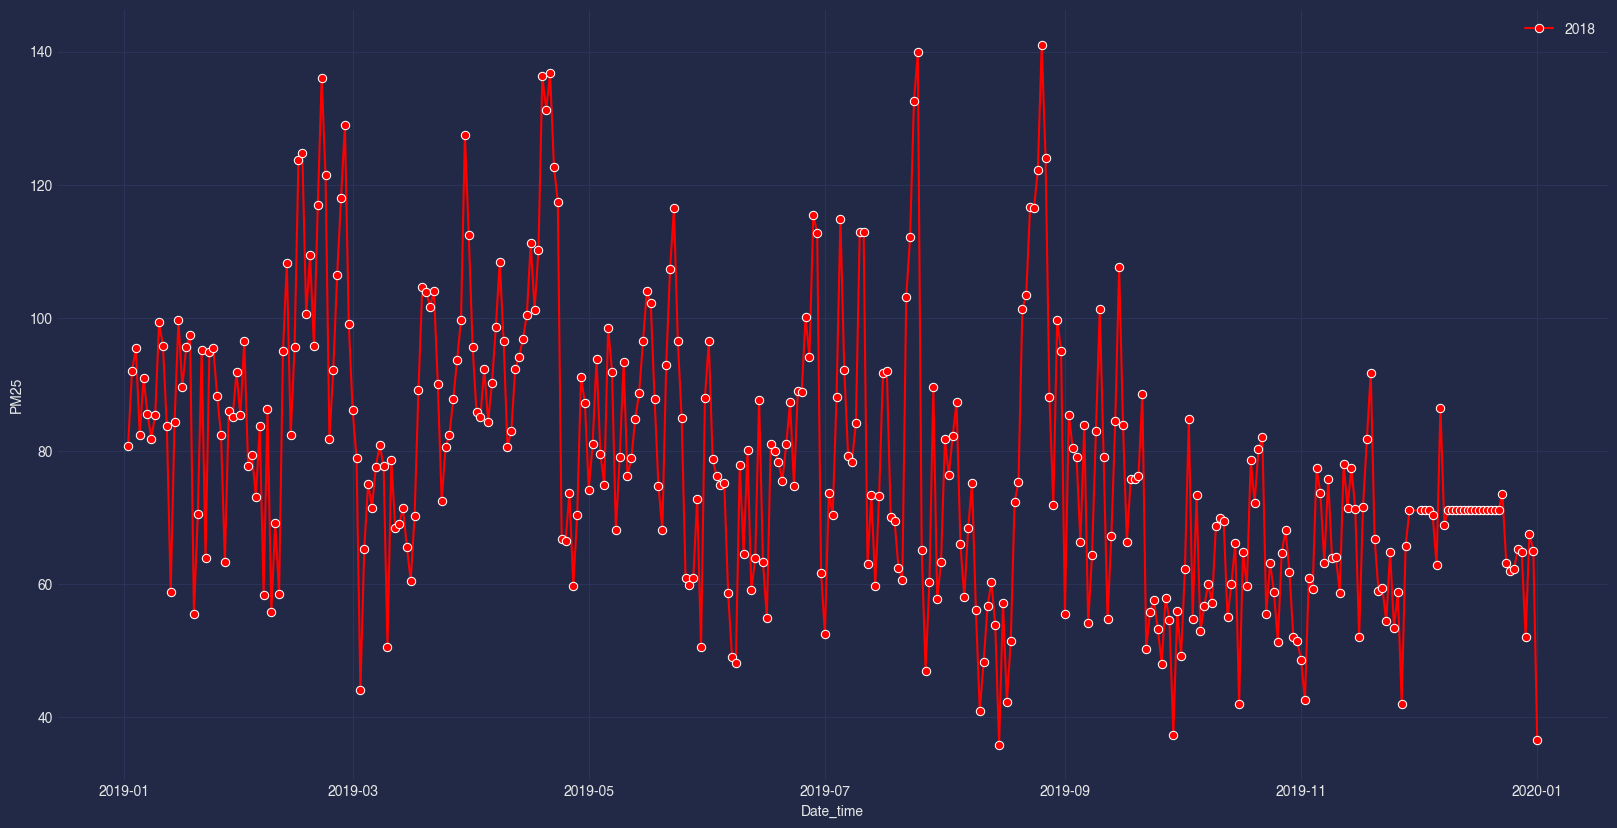

In [43]:
plt.figure(figsize=(20,10))



plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


fig.suptitle('MEAN PM25 per Month - Per Year')


# 2018
sns.lineplot( x = "Date_time", y = "PM25", data=PA75016_daily_cat[366:729],
             
             
             
             marker = "o",label="2018",color = "red")


plt.show()




In [ ]:
import numpy as np


In [33]:
df_test = PA75016_daily_cat[["PM25","Date_time"]]
df_test



,PM25,Date_time
0,71.10,2018-01-01
1,71.10,2018-01-02
2,71.10,2018-01-03
3,71.10,2018-01-04
4,71.10,2018-01-05
...,...,...
1770,57.41,2022-11-09
1771,55.69,2022-11-10
1772,35.26,2022-11-11
1773,49.01,2022-11-12


In [34]:
df_test["J-1"] = df_test["PM25"].shift(1)
df_test["J-2"] = df_test["PM25"].shift(2)
df_test["J-3"] = df_test["PM25"].shift(3)
df_test["J-4"] = df_test["PM25"].shift(4)
df_test["J-5"] = df_test["PM25"].shift(5)
df_test["J-6"] = df_test["PM25"].shift(6)
df_test["J-7"] = df_test["PM25"].shift(7)


#df_test["mean shift"] = df_test[["J-1","J-2","J-3","J-4","J-5","J-6","J-7"]].mean()
df_test



#PA75016_daily_cat = PA75016_daily_cat.dropna()
#PA75016_daily_cat













/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_33436/2275537234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["J-1"] = df_test["PM25"].shift(1)
/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_33436/2275537234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["J-2"] = df_test["PM25"].shift(2)
/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_33436/2275537234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,PM25,Date_time,J-1,J-2,J-3,J-4,J-5,J-6,J-7
0,71.10,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,71.10,2018-01-02,71.10,NaN,NaN,NaN,NaN,NaN,NaN
2,71.10,2018-01-03,71.10,71.10,NaN,NaN,NaN,NaN,NaN
3,71.10,2018-01-04,71.10,71.10,71.10,NaN,NaN,NaN,NaN
4,71.10,2018-01-05,71.10,71.10,71.10,71.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1770,57.41,2022-11-09,40.96,43.02,36.53,53.37,53.00,46.97,45.75
1771,55.69,2022-11-10,57.41,40.96,43.02,36.53,53.37,53.00,46.97
1772,35.26,2022-11-11,55.69,57.41,40.96,43.02,36.53,53.37,53.00
1773,49.01,2022-11-12,35.26,55.69,57.41,40.96,43.02,36.53,53.37


In [35]:
df_test = df_test.dropna()
df_test





,PM25,Date_time,J-1,J-2,J-3,J-4,J-5,J-6,J-7
7,75.84,2018-01-08,71.10,71.10,71.10,71.10,71.10,71.10,71.10
8,61.04,2018-01-09,75.84,71.10,71.10,71.10,71.10,71.10,71.10
9,83.58,2018-01-10,61.04,75.84,71.10,71.10,71.10,71.10,71.10
10,82.75,2018-01-11,83.58,61.04,75.84,71.10,71.10,71.10,71.10
11,84.88,2018-01-12,82.75,83.58,61.04,75.84,71.10,71.10,71.10
...,...,...,...,...,...,...,...,...,...
1770,57.41,2022-11-09,40.96,43.02,36.53,53.37,53.00,46.97,45.75
1771,55.69,2022-11-10,57.41,40.96,43.02,36.53,53.37,53.00,46.97
1772,35.26,2022-11-11,55.69,57.41,40.96,43.02,36.53,53.37,53.00
1773,49.01,2022-11-12,35.26,55.69,57.41,40.96,43.02,36.53,53.37


In [41]:
df_test["mean_shift"]=df_test[["J-1","J-2","J-3","J-4","J-5","J-6","J-7"]].mean(axis=1)
df_test







/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_33436/1375961410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["mean_shift"]=df_test[["J-1","J-2","J-3","J-4","J-5","J-6","J-7"]].mean(axis=1)


,PM25,Date_time,J-1,J-2,J-3,J-4,J-5,J-6,J-7,mean_shift
7,75.84,2018-01-08,71.10,71.10,71.10,71.10,71.10,71.10,71.10,71.100000
8,61.04,2018-01-09,75.84,71.10,71.10,71.10,71.10,71.10,71.10,71.777143
9,83.58,2018-01-10,61.04,75.84,71.10,71.10,71.10,71.10,71.10,70.340000
10,82.75,2018-01-11,83.58,61.04,75.84,71.10,71.10,71.10,71.10,72.122857
11,84.88,2018-01-12,82.75,83.58,61.04,75.84,71.10,71.10,71.10,73.787143
...,...,...,...,...,...,...,...,...,...,...
1770,57.41,2022-11-09,40.96,43.02,36.53,53.37,53.00,46.97,45.75,45.657143
1771,55.69,2022-11-10,57.41,40.96,43.02,36.53,53.37,53.00,46.97,47.322857
1772,35.26,2022-11-11,55.69,57.41,40.96,43.02,36.53,53.37,53.00,48.568571
1773,49.01,2022-11-12,35.26,55.69,57.41,40.96,43.02,36.53,53.37,46.034286


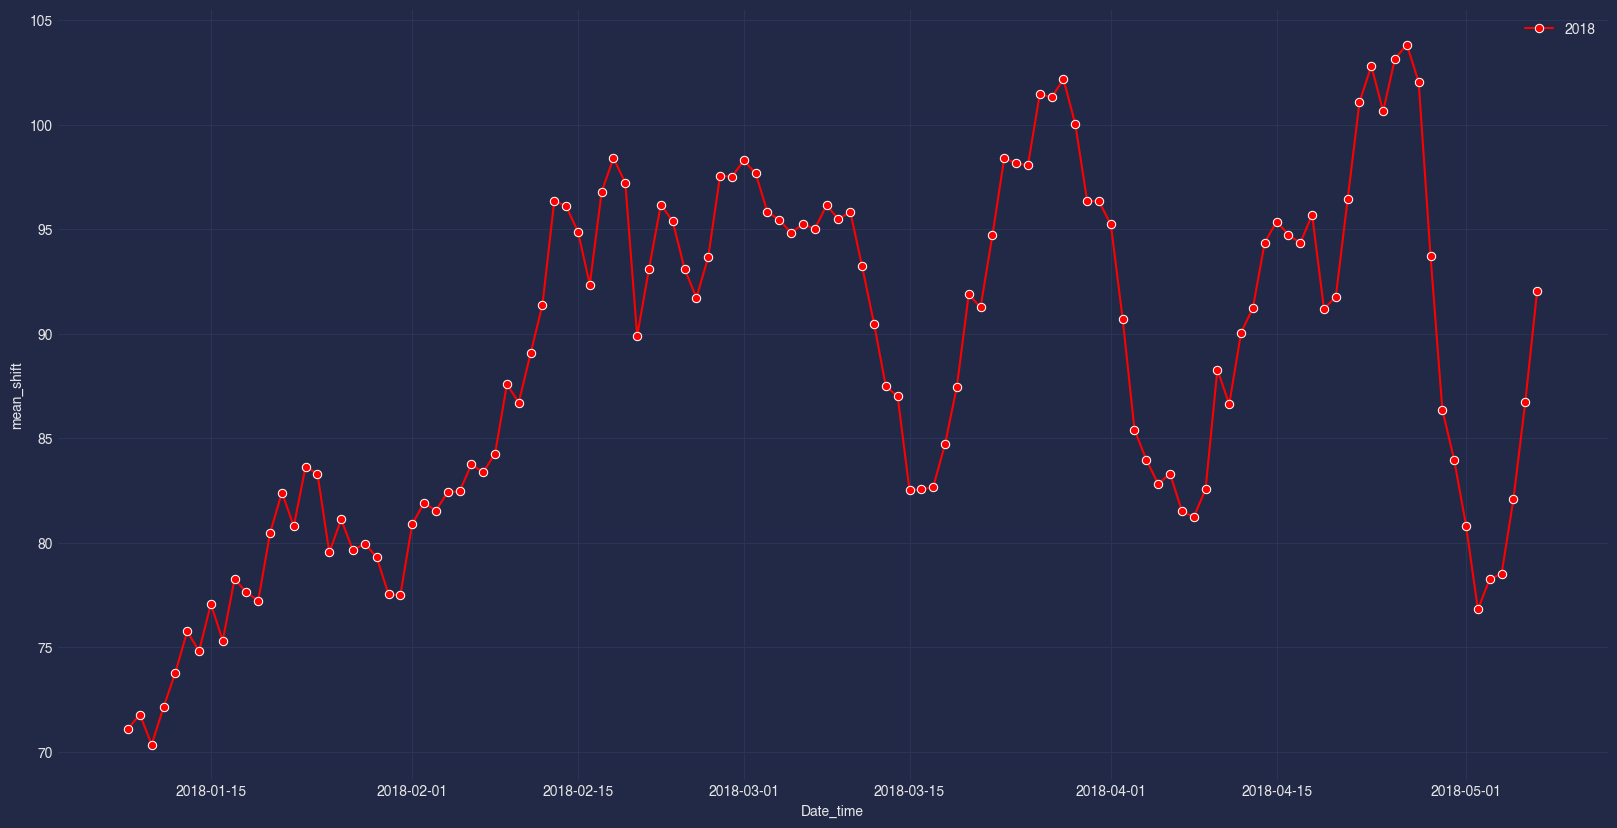

In [52]:
plt.figure(figsize=(20,10))




plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


fig.suptitle('MEAN PM25 per Month - Per Year')


# 2018
sns.lineplot( x = "Date_time", y = "mean_shift", data=df_test[0:120],
             
             
             
             marker = "o",label="2018",color = "red")


plt.show()




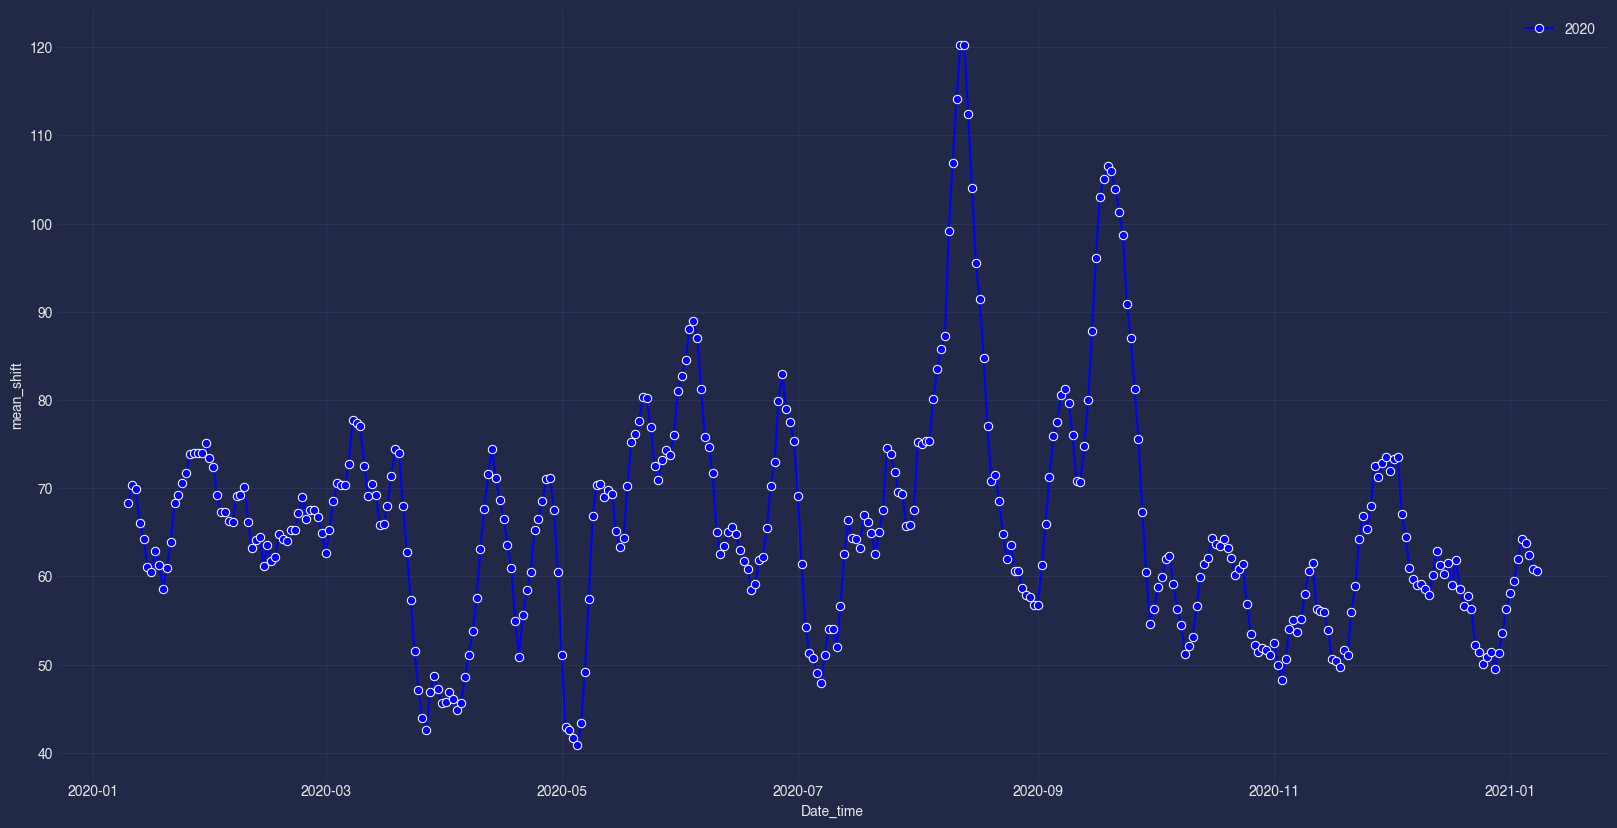

In [55]:
plt.figure(figsize=(20,10))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

fig.suptitle('MEAN PM25 per day')

# 2018
sns.lineplot( x = "Date_time", y = "mean_shift", data=df_test[730:1095],

             marker = "o",label="2020",color = "blue")
plt.show()



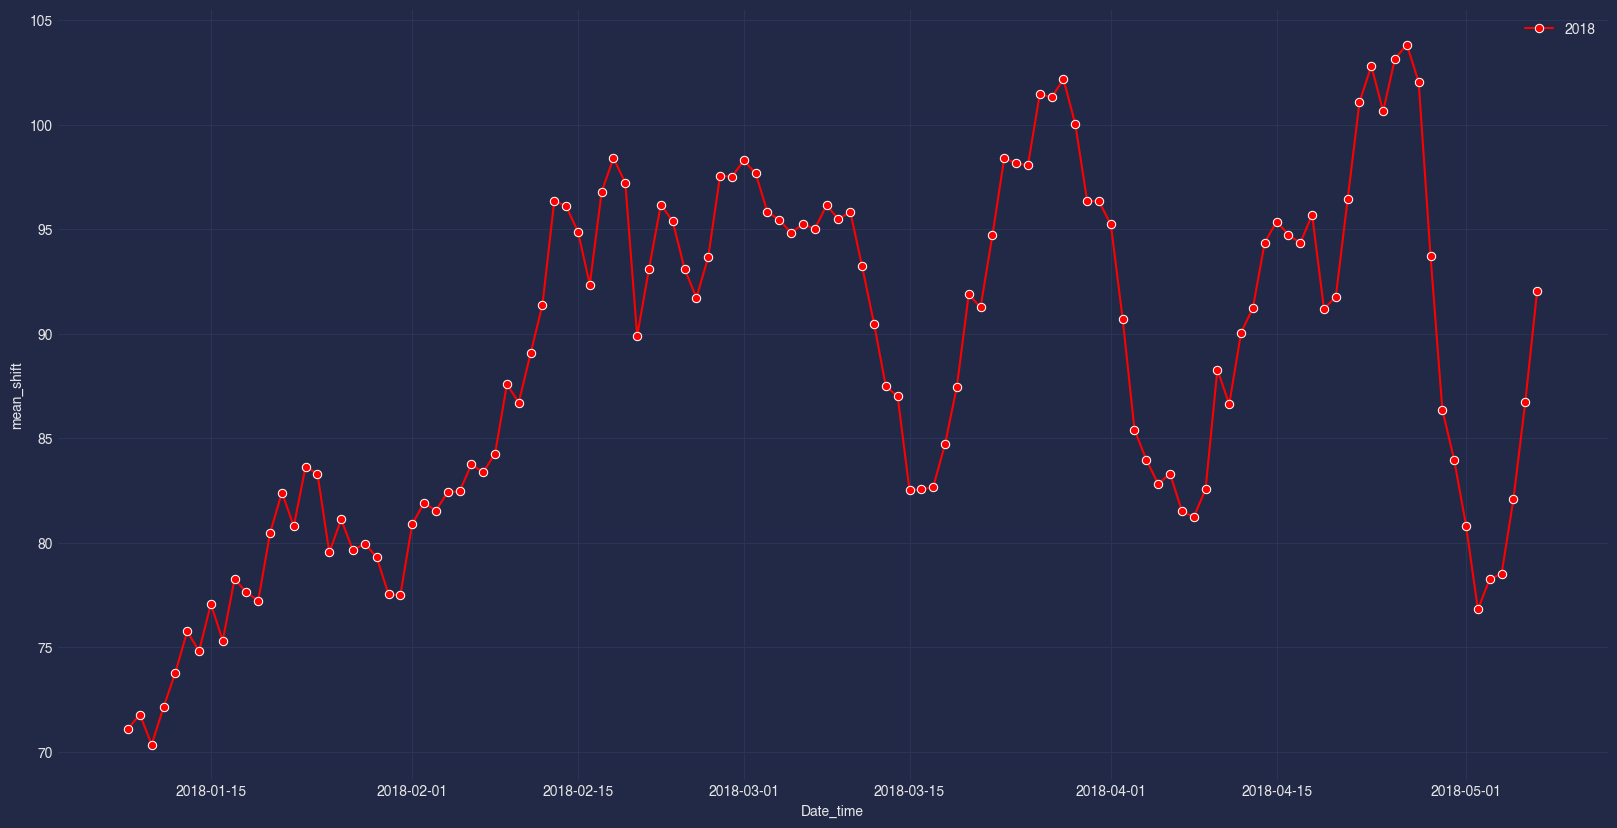

In [62]:
plt.figure(figsize=(20,10))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

fig.suptitle('MEAN PM25 per day')


sns.lineplot( x = "Date_time", y = "mean_shift", data=df_test[0:120],marker = "o",label="2018",color = "red")

# 2018



plt.show()


In [72]:
df_ref.dtypes




PM25                 float64
Date_time     datetime64[ns]
J-1                  float64
J-2                  float64
J-3                  float64
J-4                  float64
J-5                  float64
J-6                  float64
J-7                  float64
mean_shift           float64
dtype: object

In [113]:
df_ref["Month-Day"]=df_ref.Date_time.map(lambda x: x.strftime('%m-%d'))
df_ref
df_ref_3 = df_ref.groupby(by="Month-Day",as_index=False).mean()




/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_33436/2701758601.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ref_3 = df_ref.groupby(by="Month-Day",as_index=False).mean()


In [109]:
df_ref['MonthDay'] = df_ref['Date_time'].map(lambda x: 10*x.month + x.day)


df_ref.head(25)







,PM25,Date_time,J-1,J-2,J-3,J-4,J-5,J-6,J-7,mean_shift,Date_time_2,day,month,YearMonth,YearDay,MonthDay
7,75.84,2018-01-08,71.10,71.10,71.10,71.10,71.10,71.10,71.10,71.100000,2018-01-08,8,1,201801,201808,18
8,61.04,2018-01-09,75.84,71.10,71.10,71.10,71.10,71.10,71.10,71.777143,2018-01-09,9,1,201801,201809,19
9,83.58,2018-01-10,61.04,75.84,71.10,71.10,71.10,71.10,71.10,70.340000,2018-01-10,10,1,201801,201810,20
10,82.75,2018-01-11,83.58,61.04,75.84,71.10,71.10,71.10,71.10,72.122857,2018-01-11,11,1,201801,201811,21
11,84.88,2018-01-12,82.75,83.58,61.04,75.84,71.10,71.10,71.10,73.787143,2018-01-12,12,1,201801,201812,22
12,64.46,2018-01-13,84.88,82.75,83.58,61.04,75.84,71.10,71.10,75.755714,2018-01-13,13,1,201801,201813,23
13,86.96,2018-01-14,64.46,84.88,82.75,83.58,61.04,75.84,71.10,74.807143,2018-01-14,14,1,201801,201814,24
14,63.50,2018-01-15,86.96,64.46,84.88,82.75,83.58,61.04,75.84,77.072857,2018-01-15,15,1,201801,201815,25
15,81.71,2018-01-16,63.50,86.96,64.46,84.88,82.75,83.58,61.04,75.310000,2018-01-16,16,1,201801,201816,26
16,79.09,2018-01-17,81.71,63.50,86.96,64.46,84.88,82.75,83.58,78.262857,2018-01-17,17,1,201801,201817,27


In [100]:
import datetime as dt
df_ref = df_test.copy()
df_ref



# on veut créer 3 colonnes qui est la moyenne de l'année

#On veut créer une année fictive qui est en fait la moyenne des autres années
#On veut créer 
#Puis on plot cette année fictive : 


#et on regarde les pics de pollution 

df_ref["Date_time_2"]= df_ref["Date_time"].astype(str)

df_ref["day"]= df_ref["Date_time"].dt.day

df_ref["month"]= df_ref["Date_time"].dt.month



df_ref_2 = df_ref.groupby(by=["month","day"],as_index=False).mean()
df_ref














/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_33436/3105150681.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ref_2 = df_ref.groupby(by=["month","day"],as_index=False).mean()


,month,day,PM25,J-1,J-2,J-3,J-4,J-5,J-6,J-7,mean_shift
0,1,1,57.0650,71.8725,66.3825,61.9900,64.7425,54.8625,60.1875,63.8325,63.410000
1,1,2,63.2175,57.0650,71.8725,66.3825,61.9900,64.7425,54.8625,60.1875,62.443214
2,1,3,65.3700,63.2175,57.0650,71.8725,66.3825,61.9900,64.7425,54.8625,62.876071
3,1,4,77.2975,65.3700,63.2175,57.0650,71.8725,66.3825,61.9900,64.7425,64.377143
4,1,5,72.1200,77.2975,65.3700,63.2175,57.0650,71.8725,66.3825,61.9900,66.170714
...,...,...,...,...,...,...,...,...,...,...,...
361,12,27,54.8625,60.1875,63.8325,65.4300,59.9325,62.8150,65.4650,68.1900,63.693214
362,12,28,64.7425,54.8625,60.1875,63.8325,65.4300,59.9325,62.8150,65.4650,61.789286
363,12,29,61.9900,64.7425,54.8625,60.1875,63.8325,65.4300,59.9325,62.8150,61.686071
364,12,30,66.3825,61.9900,64.7425,54.8625,60.1875,63.8325,65.4300,59.9325,61.568214


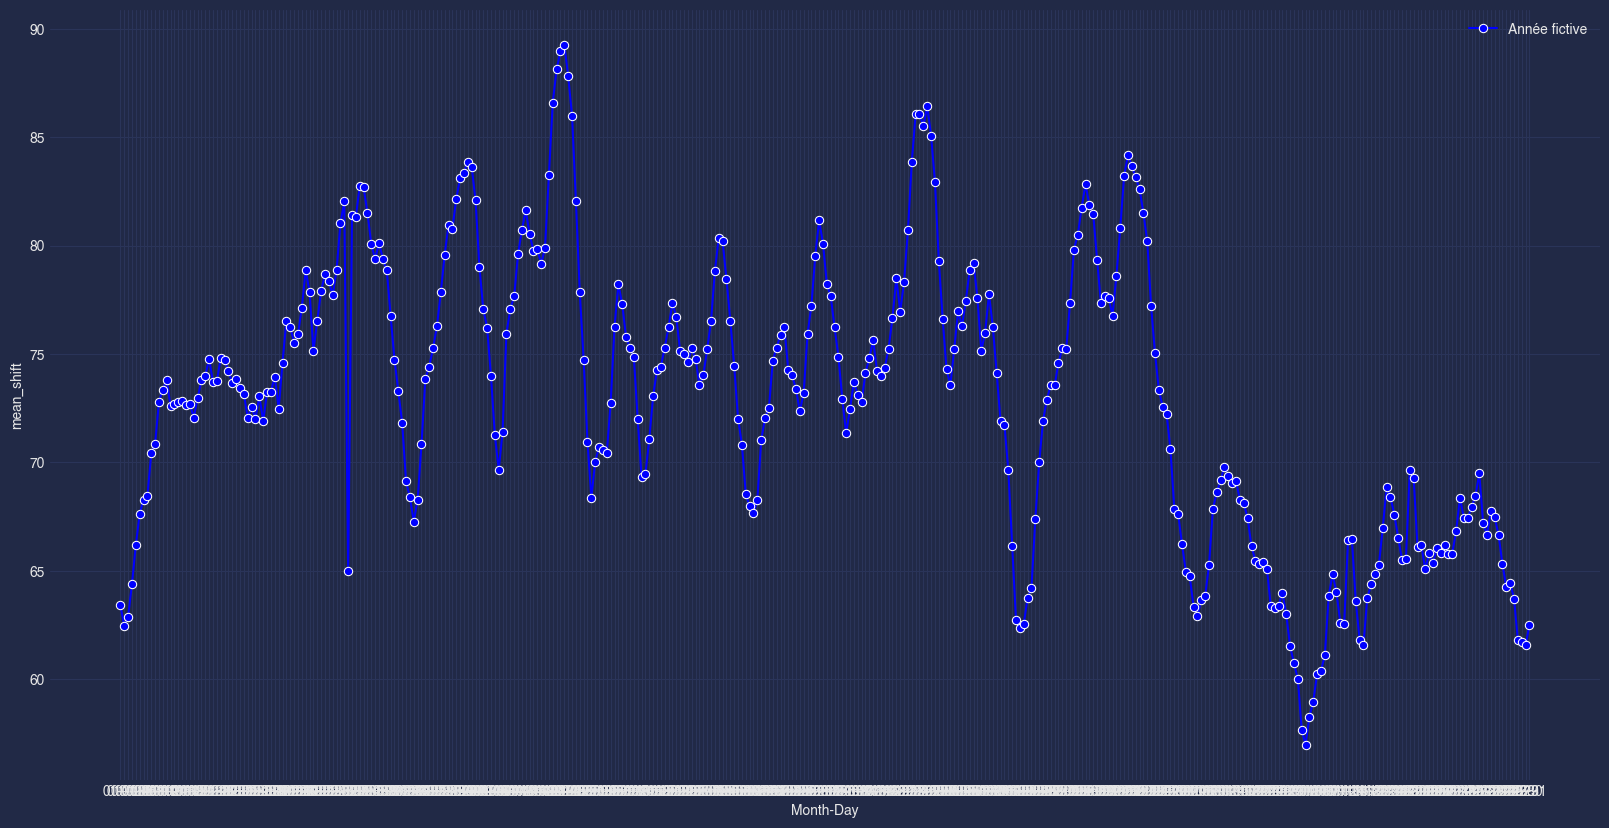

In [114]:
plt.figure(figsize=(20,10))

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

fig.suptitle('MEAN PM25 per day')

# 2018
sns.lineplot( x = "Month-Day", y = "mean_shift", data=df_ref_3,
             marker = "o",label="Année fictive",color = "blue")
plt.show()








In [ ]:
#Maintenant il faut qu'on définisse une règle pour indiquer l'encodage que notre modèle va suivre 
# Notre règle va être basé sur 80 

In [115]:
def encoder(x):
    if x > 80:
        return 1
    else:
        return 0

In [122]:
#Encoding 

df_test["Pollution_peak"] = df_test["mean_shift"]
df_test["Pollution_peak"] = df_test["mean_shift"].apply(encoder)
df_test[df_test["Pollution_peak"] == 1]







/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_33436/2190172509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Pollution_peak"] = df_test["mean_shift"]
/var/folders/5r/4vh837mj0yz7906w_9ntwqfm0000gn/T/ipykernel_33436/2190172509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Pollution_peak"] = df_test["mean_shift"].apply(encoder)


,PM25,Date_time,J-1,J-2,J-3,J-4,J-5,J-6,J-7,mean_shift,Pollution_peak
19,78.00,2018-01-20,107.54,80.00,79.09,81.71,63.50,86.96,64.46,80.465714,1
20,75.67,2018-01-21,78.00,107.54,80.00,79.09,81.71,63.50,86.96,82.400000,1
21,83.50,2018-01-22,75.67,78.00,107.54,80.00,79.09,81.71,63.50,80.787143,1
22,79.25,2018-01-23,83.50,75.67,78.00,107.54,80.00,79.09,81.71,83.644286,1
23,52.75,2018-01-24,79.25,83.50,75.67,78.00,107.54,80.00,79.09,83.292857,1
...,...,...,...,...,...,...,...,...,...,...,...
1661,65.53,2022-07-23,71.86,68.50,68.41,115.85,136.16,77.45,83.79,88.860000,1
1662,81.70,2022-07-24,65.53,71.86,68.50,68.41,115.85,136.16,77.45,86.251429,1
1663,51.83,2022-07-25,81.70,65.53,71.86,68.50,68.41,115.85,136.16,86.858571,1
1684,51.56,2022-08-15,61.42,89.10,110.43,97.75,82.06,60.17,61.97,80.414286,1
